# Machine Learning Final Project: Question 2
## Team members:
 - ## <span style="color:green">521H0489: Hồ Hữu An</span>.
 - ## <span style="color:green">521H0491: Trần Nhựt Anh</span>.
 - ## <span style="color:green">521H0290: Đỗ Minh Quân</span>.

# Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.multioutput import MultiOutputClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier, StackingClassifier, VotingClassifier, BaggingClassifier
import xgboost as xgb
import lightgbm as lgb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

import warnings
warnings.filterwarnings("ignore")

# Exploratory Data Analysis and Wrangling

## `Read data`

In [2]:
train_df = pd.read_csv("../data/train.csv")
test_df = pd.read_csv("../data/test.csv")

## `Get sample`

In [3]:
train_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
9871,46,admin.,single,secondary,no,9326,no,yes,unknown,9,jun,105,1,-1,0,unknown,no
1666,33,technician,married,secondary,no,0,no,no,unknown,9,may,120,1,-1,0,unknown,no
29667,58,self-employed,married,secondary,no,0,yes,no,telephone,3,feb,702,3,264,9,failure,no
3982,54,management,single,tertiary,no,4393,yes,no,unknown,16,may,1297,3,-1,0,unknown,yes
8559,23,services,single,secondary,no,425,yes,no,unknown,3,jun,768,1,-1,0,unknown,yes
30618,42,blue-collar,divorced,primary,no,103,yes,no,cellular,6,feb,170,1,-1,0,unknown,no
24498,52,self-employed,married,tertiary,no,0,yes,no,cellular,17,nov,117,2,-1,0,unknown,no
36891,49,management,divorced,tertiary,no,108,yes,no,cellular,12,may,288,2,350,2,failure,no
2452,46,blue-collar,married,secondary,no,1934,yes,no,unknown,13,may,20,1,-1,0,unknown,no
4860,41,technician,married,secondary,no,2490,yes,no,unknown,21,may,115,2,-1,0,unknown,no


In [4]:
test_df.sample(10)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
3428,29,self-employed,married,tertiary,no,1,no,no,cellular,18,jul,167,3,-1,0,unknown,no
1158,38,management,single,tertiary,no,1373,no,no,cellular,22,oct,119,4,-1,0,unknown,no
71,42,entrepreneur,divorced,tertiary,yes,2,yes,no,unknown,5,may,380,1,-1,0,unknown,no
2901,37,services,single,tertiary,no,223,yes,no,unknown,28,may,25,1,-1,0,unknown,no
1531,46,blue-collar,married,primary,no,2749,yes,no,cellular,17,nov,332,1,-1,0,unknown,no
784,27,blue-collar,single,secondary,no,5,yes,no,unknown,19,may,205,3,-1,0,unknown,no
1145,59,self-employed,married,primary,no,0,yes,no,telephone,28,jul,97,2,-1,0,unknown,no
1376,28,management,single,tertiary,no,1466,yes,no,cellular,25,jul,40,1,-1,0,unknown,no
1105,41,management,married,tertiary,no,2885,no,no,cellular,19,nov,40,1,-1,0,unknown,no
752,31,blue-collar,married,primary,no,352,yes,no,unknown,19,may,97,9,-1,0,unknown,no


## `Get data informaion`

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


# Statistical analysis on data

## `1. Overview statistics`

In [6]:
train_df.describe().round(2).style.format(precision=2).background_gradient(cmap="Blues")

,age,balance,day,duration,campaign,pdays,previous
count,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00,45211.00
mean,40.94,1362.27,15.81,258.16,2.76,40.20,0.58
std,10.62,3044.77,8.32,257.53,3.10,100.13,2.30
min,18.00,-8019.00,1.00,0.00,1.00,-1.00,0.00
25%,33.00,72.00,8.00,103.00,1.00,-1.00,0.00
50%,39.00,448.00,16.00,180.00,2.00,-1.00,0.00
75%,48.00,1428.00,21.00,319.00,3.00,-1.00,0.00
max,95.00,102127.00,31.00,4918.00,63.00,871.00,275.00


## `2. Correlation Matrix`

Text(0.5, 1.0, 'Data correlations')

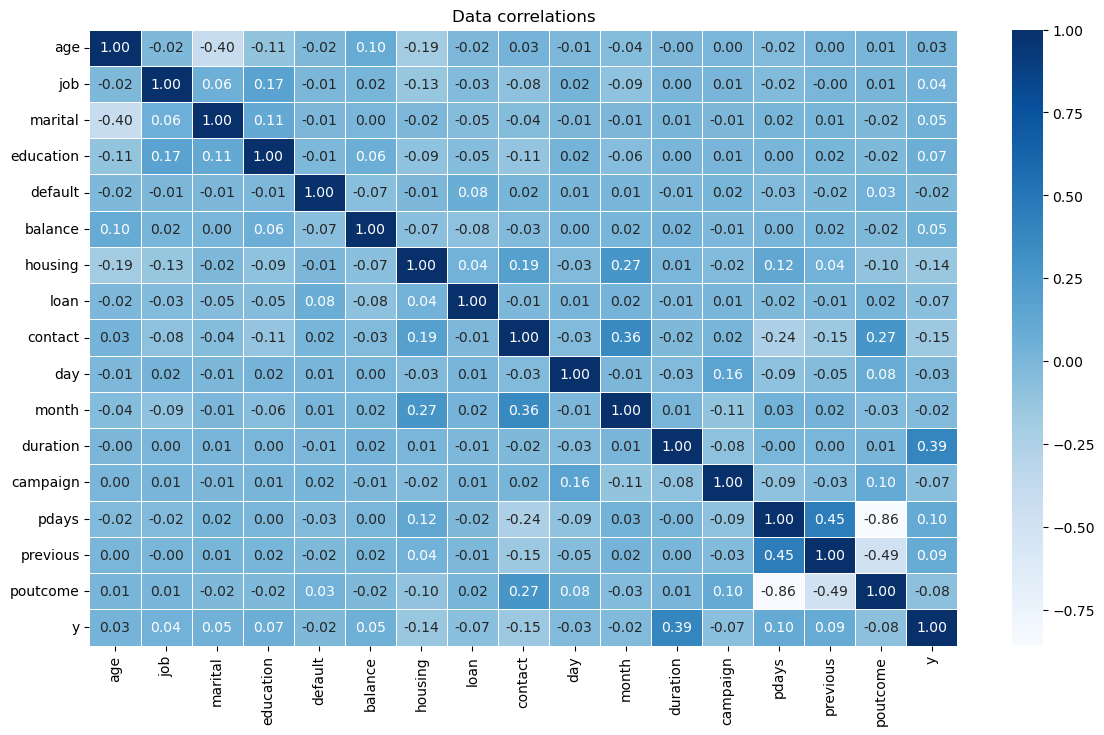

In [7]:
encoded_train = train_df.copy()

for column in encoded_train.columns:
    if encoded_train[column].dtype == 'object':
        label_encoder = LabelEncoder()
        encoded_train[column] = label_encoder.fit_transform(encoded_train[column])

correlation = encoded_train.corr()
plt.figure(figsize=(14,8))
sns.heatmap(correlation,annot=True,fmt='.2f',annot_kws={'size': 10},linewidths=0.5,cmap='Blues')
plt.title("Data correlations")

## `3. Chart Box`

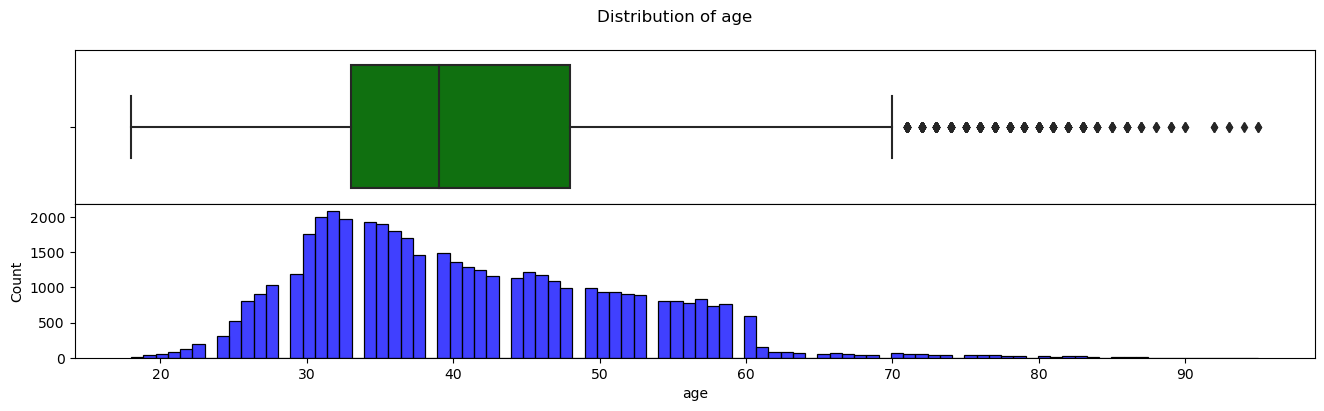

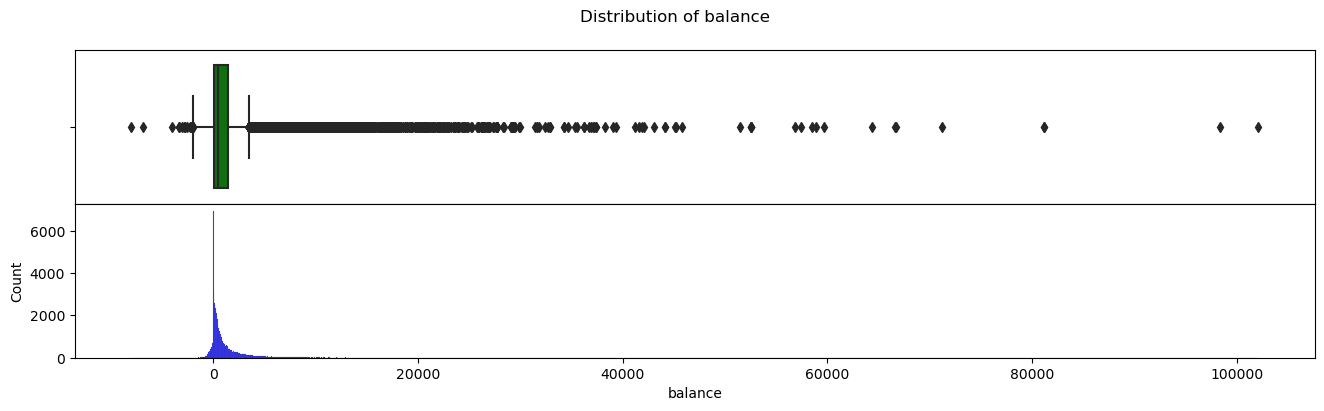

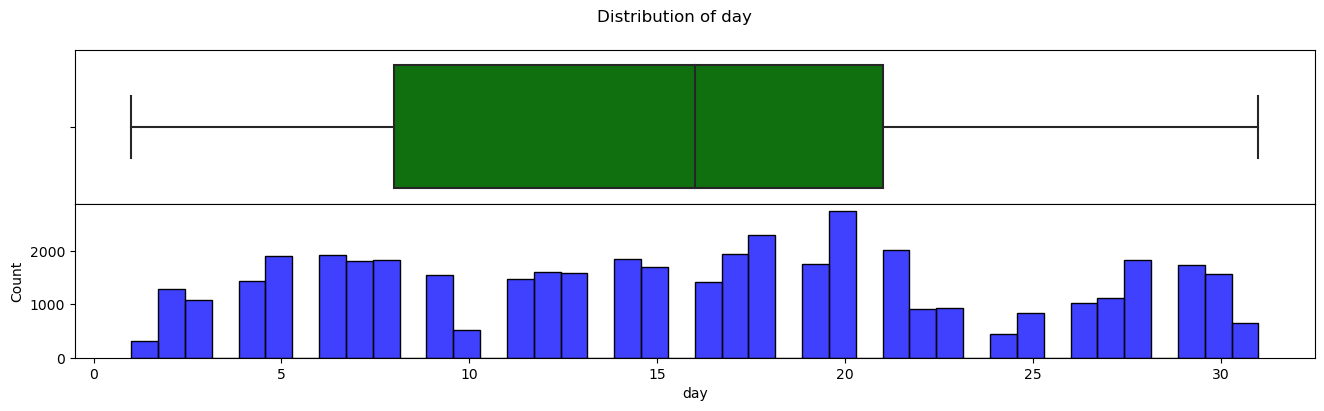

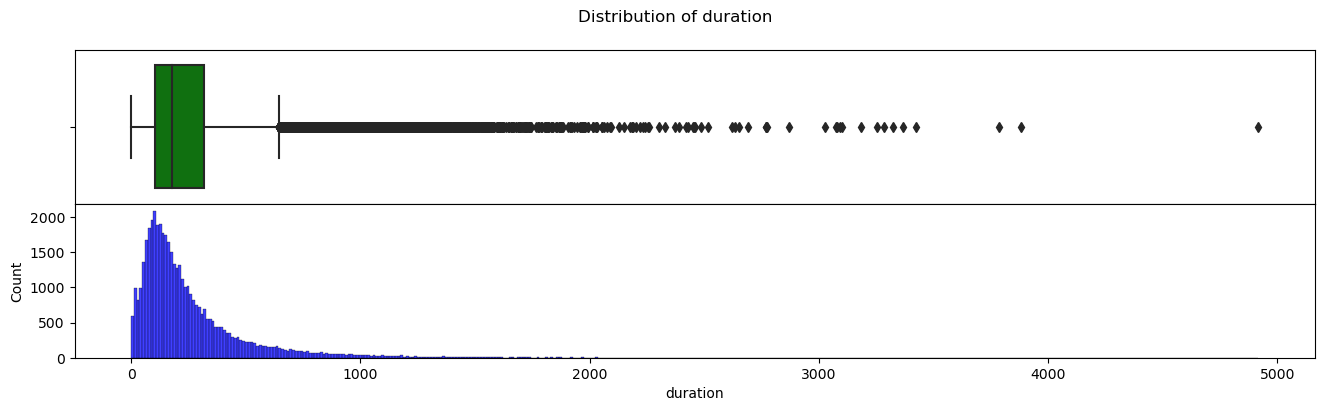

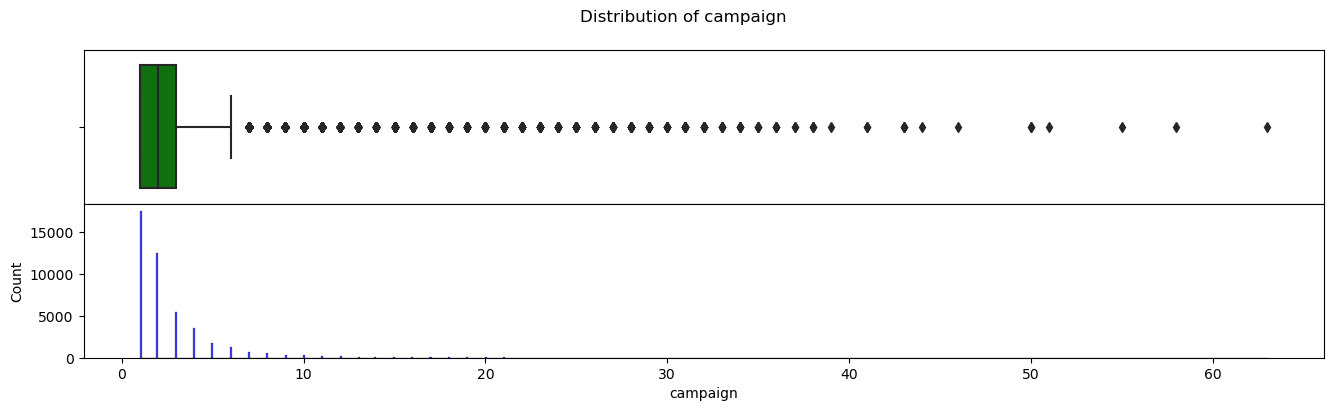

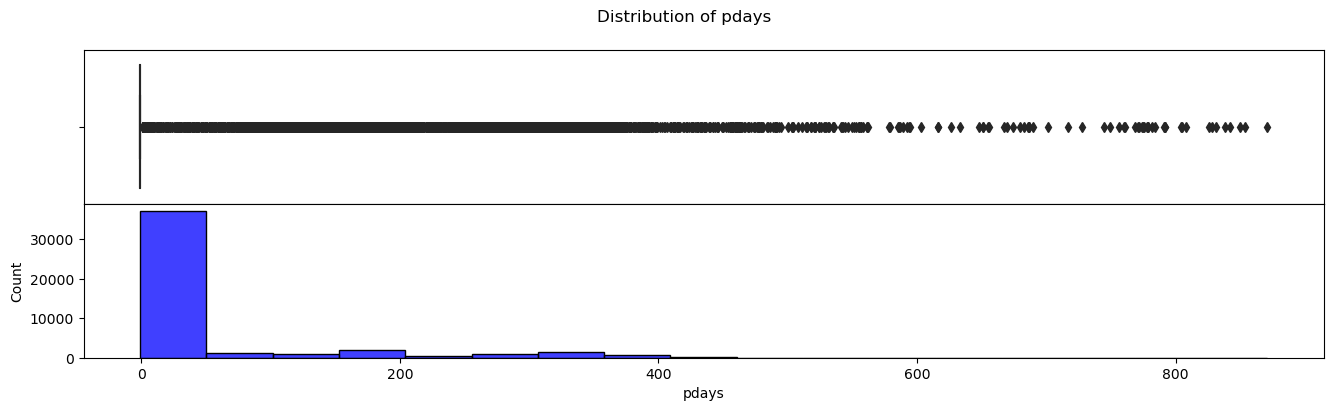

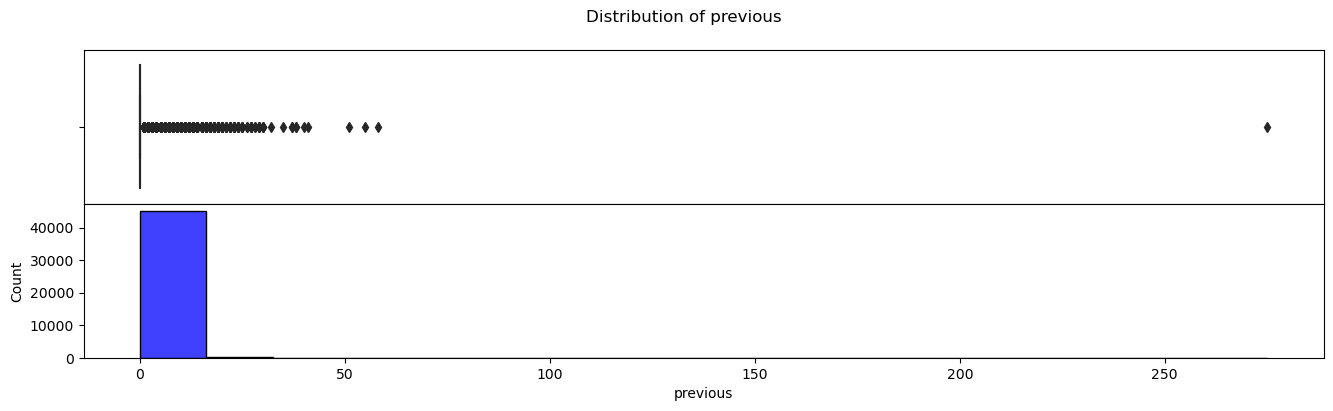

In [8]:
numerical = train_df.select_dtypes(exclude='object')
n = len(numerical)

for col in numerical:
    fig, (ax1, ax2) = plt.subplots(nrows=2, figsize=(16, 4))
    plt.suptitle(f"Distribution of {col}")
    sns.boxplot(data=train_df, x=col, ax=ax1, color="Green")
    ax1.set_xlabel(None)
    ax1.get_xaxis().set_ticks([])
    sns.histplot(data=train_df, x=col, ax=ax2, color="Blue")
    plt.subplots_adjust(hspace=0)
    print("\n")
    plt.show()

## `4. Target class imbalance`

Count of each Status:
no     39922
yes     5289
Name: y, dtype: int64



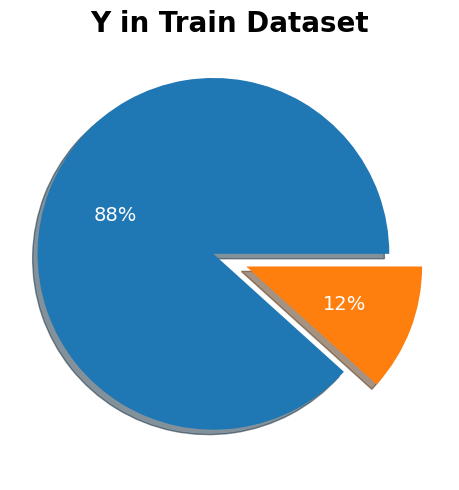

In [9]:
status_counts = train_df['y'].value_counts()
print("Count of each Status:")
print(status_counts)
print()

fig, ax = plt.subplots(1, 1, figsize=(8, 5))

ax.pie(
    train_df['y'].value_counts(), 
    shadow=True, 
    explode=[.1 for i in range(train_df['y'].nunique())],
    autopct='%1.f%%',
    textprops={'size': 14, 'color': 'white'}
)

ax.set_title('Y in Train Dataset', fontsize=20, fontweight='bold')

plt.tight_layout()
plt.show()

# Data preprocessing

## `1 Data encoding`

In [10]:
train_df = pd.get_dummies(train_df, columns=['y'])
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_no,y_yes
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,1,0
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,1,0
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,1,0
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,1,0
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,0,1
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,0,1
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,0,1
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,1,0


In [11]:
test_df = pd.get_dummies(test_df, columns=['y'])
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_no,y_yes
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,1,0
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,1,0
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,1,0
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,1,0
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,services,married,secondary,no,-333,yes,no,cellular,30,jul,329,5,-1,0,unknown,1,0
4517,57,self-employed,married,tertiary,yes,-3313,yes,yes,unknown,9,may,153,1,-1,0,unknown,1,0
4518,57,technician,married,secondary,no,295,no,no,cellular,19,aug,151,11,-1,0,unknown,1,0
4519,28,blue-collar,married,secondary,no,1137,no,no,cellular,6,feb,129,4,211,3,other,1,0


In [12]:
le = LabelEncoder()
train_df = train_df.apply(le.fit_transform)
train_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_no,y_yes
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3,1,0
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3,1,0
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3,1,0
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3,1,0
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3,0,1
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3,0,1
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2,0,1
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3,1,0


In [13]:
test_df = test_df.apply(le.fit_transform)
test_df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y_no,y_yes
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3,1,0
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0,1,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3,1,0
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3,1,0
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3,1,0
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3,1,0
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1,1,0


## `2 Data Splitting`

In [14]:
X_train = train_df.drop(columns=['y_no', 'y_yes'], axis =1)
y_train = train_df[['y_no', 'y_yes']]


X_test = test_df.drop(columns=['y_no', 'y_yes'], axis =1)
y_test = test_df[['y_no', 'y_yes']]

In [15]:
X_train

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,40,4,1,2,0,3036,1,0,2,4,8,261,0,0,0,3
1,26,9,2,1,0,945,1,0,2,4,8,151,0,0,0,3
2,15,2,1,1,0,918,1,1,2,4,8,76,0,0,0,3
3,29,1,1,3,0,2420,1,0,2,4,8,92,0,0,0,3
4,15,11,2,3,0,917,0,0,2,4,8,198,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,33,9,1,2,0,1741,0,0,0,16,9,975,2,0,0,3
45207,53,5,0,0,0,2639,0,0,0,16,9,456,1,0,0,3
45208,54,5,1,1,0,5455,0,0,0,16,9,1116,4,181,3,2
45209,39,1,1,1,0,1584,0,0,1,16,9,508,3,0,0,3


In [16]:
X_test

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome
0,11,10,1,0,0,1475,0,0,0,18,10,75,0,0,0,3
1,14,7,1,1,0,2030,1,1,0,10,8,216,0,228,4,0
2,16,4,2,2,0,1303,1,0,0,15,0,181,0,219,1,0
3,11,4,1,2,0,1352,1,1,2,2,6,195,3,0,0,3
4,40,1,1,1,0,274,1,0,2,4,8,222,0,0,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,14,7,1,1,0,119,1,0,0,29,5,325,4,0,0,3
4517,38,6,1,2,1,0,1,1,2,8,8,149,0,0,0,3
4518,38,9,1,1,0,558,0,0,0,18,1,147,10,0,0,3
4519,9,1,1,1,0,1187,0,0,0,5,3,125,3,140,3,1


# Basic Model

## `Logistic Regression`

In [17]:
LR = LogisticRegression()
multi_classifier = MultiOutputClassifier(LR)
multi_classifier.fit(X_train, y_train)

MultiOutputClassifier(estimator=LogisticRegression())

In [18]:
predictions = multi_classifier.predict(X_test)

## `KNN`

In [19]:
KNN = KNeighborsClassifier(n_neighbors=5)
KNN.fit(X_train, y_train)

KNeighborsClassifier()

## `Decision Trree`

In [20]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)

DecisionTreeClassifier()

## `Naive Bayes`

In [21]:
GNB = GaussianNB()
multi_gnb = MultiOutputClassifier(GNB)
multi_gnb.fit(X_train, y_train)

MultiOutputClassifier(estimator=GaussianNB())

## `SVM`

In [22]:
svm = SVC()
multi_svm = MultiOutputClassifier(svm)
multi_svm.fit(X_train, y_train)

MultiOutputClassifier(estimator=SVC())

## `Perceptron`

In [23]:
perceptron = Perceptron()
multi_perceptron = MultiOutputClassifier(perceptron)
multi_perceptron.fit(X_train, y_train)

MultiOutputClassifier(estimator=Perceptron())

# Ensemble Learing

## `Bagging`

In [24]:
bagging = BaggingClassifier(base_estimator=KNeighborsClassifier(), n_estimators=10, random_state=42)
multi_bagging = MultiOutputClassifier(bagging)
multi_bagging.fit(X_train, y_train)

MultiOutputClassifier(estimator=BaggingClassifier(base_estimator=KNeighborsClassifier(),
                                                  random_state=42))

In [25]:
y_pred = multi_bagging.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8834328688343287


## `Voting`

In [26]:
voting = VotingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier()), ('logreg', LogisticRegression())], voting='hard')
multi_voting = MultiOutputClassifier(voting)
multi_voting.fit(X_train, y_train)

MultiOutputClassifier(estimator=VotingClassifier(estimators=[('ada',
                                                              AdaBoostClassifier()),
                                                             ('rf',
                                                              RandomForestClassifier()),
                                                             ('logreg',
                                                              LogisticRegression())]))

In [27]:
y_pred = multi_voting.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9000221190002212


## `Stacking`

In [28]:
stacking = StackingClassifier(estimators=[('ada', AdaBoostClassifier()), ('rf', RandomForestClassifier())], final_estimator=LogisticRegression())
multi_stacking = MultiOutputClassifier(stacking)
multi_stacking.fit(X_train, y_train)

MultiOutputClassifier(estimator=StackingClassifier(estimators=[('ada',
                                                                AdaBoostClassifier()),
                                                               ('rf',
                                                                RandomForestClassifier())],
                                                   final_estimator=LogisticRegression()))

In [29]:
y_pred = multi_stacking.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8847600088476001


## `Random Forest`

In [30]:
RF = RandomForestClassifier(n_estimators=100, random_state=42)
RF.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [31]:
y_pred = RF.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9305463393054634


## `Gradient Boosting`

In [32]:
GB = GradientBoostingClassifier()
multi_GB = MultiOutputClassifier(GB)
multi_GB.fit(X_train, y_train)

MultiOutputClassifier(estimator=GradientBoostingClassifier())

In [33]:
y_pred = multi_GB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8962618889626189


## `Adaboost`

In [34]:
ADA = AdaBoostClassifier(n_estimators=50)
multi_ADA = MultiOutputClassifier(ADA)
multi_ADA.fit(X_train, y_train)

MultiOutputClassifier(estimator=AdaBoostClassifier())

In [35]:
y_pred = multi_ADA.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8909533289095333


## `XGBoost`

In [36]:
xgb = xgb.XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [37]:
y_pred = xgb.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.9139570891395709


## `LightGBM`

In [38]:
LGB = lgb.LGBMClassifier(random_state=42)
multi_LGB = MultiOutputClassifier(LGB)
multi_LGB.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 39922, number of negative: 5289
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002891 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 16
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.883015 -> initscore=2.021298
[LightGBM] [Info] Start training from score 2.021298
[LightGBM] [Info] Number of positive: 5289, number of negative: 39922
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001273 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 989
[LightGBM] [Info] Number of data points in the train set: 45211, number of used features: 16
[LightGBM] [Info] [binar

MultiOutputClassifier(estimator=LGBMClassifier(random_state=42))

In [39]:
y_pred = multi_LGB.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.907100199071002


# Feed Forward Neural Network

In [40]:
# model_ffnn = Sequential([
#     Dense(32, activation="relu", input_shape=(18,)),
#     Dense(16, activation="relu"),
#     Dense(3, activation="sigmoid")
# ])

In [41]:
# model_ffnn.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
# model_ffnn.fit(X_train, y_train, epochs=10, batch_size=16)

In [42]:
# loss, accuracy = model_ffnn.evaluate(X_test, y_test)

# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)

# Reccurent Neural Network

In [43]:
# # Scale the features
# scaler = MinMaxScaler()
# X_train_scaled = scaler.fit_transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# # Reshape the features for the RNN
# X_train_rnn = np.reshape(X_train_scaled, (X_train_scaled.shape[0], X_train_scaled.shape[1], 1))
# X_test_rnn = np.reshape(X_test_scaled, (X_test_scaled.shape[0], X_test_scaled.shape[1], 1))

In [44]:
# model = Sequential()
# model.add(LSTM(64, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2])))
# model.add(Dense(64, activation='relu'))
# model.add(Dense(3, activation='sigmoid'))

In [45]:
# # Compile the model
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# # Train the model
# model.fit(X_train_rnn, y_train, epochs=10, batch_size=16, validation_data=(X_test_rnn, y_test))

In [46]:
# loss, accuracy = model.evaluate(X_test_rnn, y_test)

# print("Test Loss:", loss)
# print("Test Accuracy:", accuracy)